In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/SEM4/Research Method/RM Kel 19 Experiment/data-final.csv", sep='\t')
# dataset = pd.read_csv("/content/drive/MyDrive/RESEARCH METHOD 19/XGBoost/RM Kel 19 Experiment/data-final.csv", sep='\t')
print(dataset.shape)
dataset.head()

(1015341, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
data = dataset.drop(list(dataset)[50:], axis=1)

print(data.shape)
data.head()

(1015341, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [5]:
for i in data.columns:
  data = data[(data[i].notna()) & (data[i] != 0)]

print(data.shape)

(874434, 50)


In [6]:
data['EST9'].value_counts()

4.0    247851
2.0    199050
3.0    182001
5.0    133152
1.0    112380
Name: EST9, dtype: int64

In [7]:
x = data.drop(columns=['EST9'])
y = data['EST9']

In [8]:
print(data.shape)

(874434, 50)


### Random oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# oversampler = RandomOverSampler(random_state=42)

In [ ]:
# x_resampled, y_resampled = oversampler.fit_resample(x, y)

### Split train set - test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [11]:
y_train_1 = y_train - 1
y_test_1 = y_test - 1

# Training XGBoost

In [12]:
import xgboost as xgb

In [13]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=5,
                            max_depth=10,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)

In [14]:
xgb_clf.fit(x_train, y_train_1, verbose=0, eval_set=[(x_train, y_train_1), (x_test, y_test_1)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=5, num_parallel_tree=None, objective='multi:softmax', ...)

In [15]:
y_pred = xgb_clf.predict(x_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test_1, y_pred, digits = 4))

              precision    recall  f1-score   support

         0.0     0.5889    0.5627    0.5755     11192
         1.0     0.4871    0.5458    0.5148     19922
         2.0     0.4454    0.3258    0.3763     18290
         3.0     0.5156    0.6187    0.5625     24601
         4.0     0.6580    0.5643    0.6076     13439

    accuracy                         0.5253     87444
   macro avg     0.5390    0.5235    0.5273     87444
weighted avg     0.5257    0.5253    0.5213     87444



## XGBoost Feature Importance

Nunjukin feature mana yang paling penting. Buat feature selection, buat training selanjutnya.

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

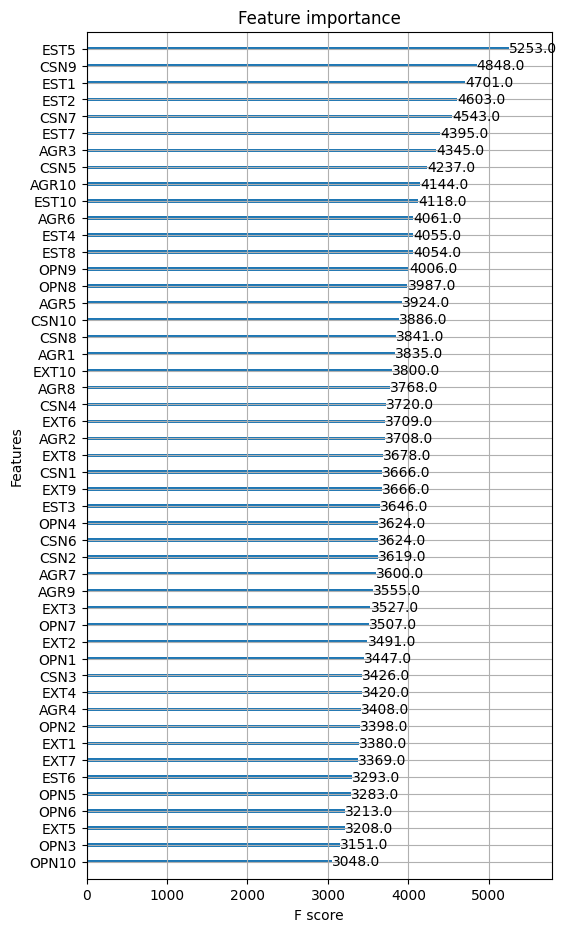

In [40]:
ax = xgb.plot_importance(xgb_clf)
fig = ax.figure
fig.set_size_inches(6, 11)
plt.show()

In [ ]:
importance_scores = xgb_clf.feature_importances_

feature_importance = dict(zip(x.columns, importance_scores))

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

sorted_features

[('EST6', 0.3710257),
 ('EST8', 0.06282551),
 ('AGR3', 0.041260857),
 ('EST7', 0.03957092),
 ('EST1', 0.032114808),
 ('EST5', 0.028041126),
 ('CSN9', 0.013773394),
 ('EST10', 0.01273237),
 ('AGR6', 0.012694935),
 ('EST3', 0.011947531),
 ('EST2', 0.011750692),
 ('AGR7', 0.011744345),
 ('CSN7', 0.011315652),
 ('AGR5', 0.011037492),
 ('AGR4', 0.010873946),
 ('OPN9', 0.010830993),
 ('EXT10', 0.010608133),
 ('AGR2', 0.010403487),
 ('AGR10', 0.010377571),
 ('CSN5', 0.010086411),
 ('AGR8', 0.009973835),
 ('AGR9', 0.00995813),
 ('OPN8', 0.009886986),
 ('OPN4', 0.009632908),
 ('EXT6', 0.009603739),
 ('EXT3', 0.009447251),
 ('EXT8', 0.009346931),
 ('AGR1', 0.009297025),
 ('EXT2', 0.0092455475),
 ('OPN7', 0.009225354),
 ('EXT7', 0.009200505),
 ('CSN6', 0.009151668),
 ('EXT9', 0.009125027),
 ('CSN4', 0.009119381),
 ('CSN10', 0.009112198),
 ('CSN2', 0.008950363),
 ('OPN2', 0.008939786),
 ('OPN6', 0.008934386),
 ('OPN10', 0.008921017),
 ('EXT5', 0.008920944),
 ('OPN5', 0.008893921),
 ('EST4', 0.0088